<a href="https://colab.research.google.com/github/neenumohan/Vagbata/blob/main/vagbata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
df=pd.read_csv('vagbata.csv')
df.head()

,Number,Lines,Author
0,1,pakvāśaya-kaṭī-sakthi-śrotrāsthi-sparśanendriy...,AH
1,2,sthānaṃ vātasya tatrāpi pakvādhānaṃ viśeṣataḥ ...,AH
2,3,nābhir āmāśayaḥ svedo lasīkā rudhiraṃ rasaḥ |,AH
3,4,dṛk sparśanaṃ ca pittasya nābhir atra viśeṣata...,AH
4,5,uraḥ-kaṇṭha-śiraḥ-kloma-parvāṇy āmāśayo rasaḥ |,AH


In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def text(tex):
  nopun=[char for char in tex if char not in string.punctuation]
  nopun=''.join(nopun)
  a=''
  i=0
  for i in range(len(nopun.split())):
    b=lemmatizer.lemmatize(nopun.split()[i],pos="v")
    a=a+b+' '
  return [word for word in a.split() if a.lower() not in stopwords.words('english')]

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df['Author']
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

pakvāśaya-kaṭī-sakthi-śrotrāsthi-sparśanendriyam |
AH


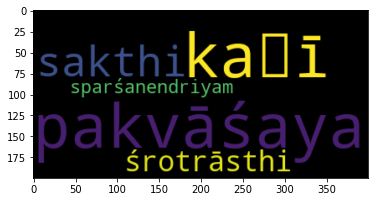

athāto doṣabhedīyaṃ nāmādhyāyaṃ vyākhyāsyāmaḥ|
AS


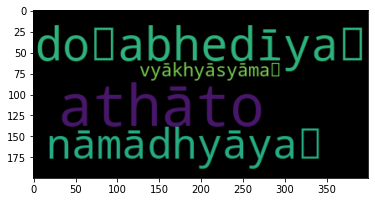

In [ ]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
x=df['Lines']
wordcloud1=WordCloud().generate(x[0])

wordcloud2=WordCloud().generate(x[21])
print(x[0])
print(df['Author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()

print(x[1])
print(df['Author'][1])
plt.imshow(wordcloud)
print(x[21])
print(df['Author'][21])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
bow_transformer=CountVectorizer(analyzer=text).fit(x_train)
test_bow_train=bow_transformer.transform(x_train)
test_bow_test=bow_transformer.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model=model.fit(test_bow_train,y_train)

In [ ]:
model.score(test_bow_train,y_train)

1.0

In [ ]:
model.score(test_bow_test,y_test)

0.53125

In [ ]:
from sklearn.metrics import classification_report
predictions=model.predict(test_bow_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        15
           1       0.62      0.29      0.40        17

    accuracy                           0.53        32
   macro avg       0.56      0.55      0.51        32
weighted avg       0.57      0.53      0.50        32



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion matrix',cmap=plt.cm.blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion matrix without normalization')
print(cm)
plt.imshow(cm,interpolation='nearest',cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks=np.arrange(len(classes))
plt.xticks=(tick_marks, classes, rotation=45)
plt.yticks=(tick_marks, classes))
fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2




SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')